# Practical 5: plotting Radar Wind Profiler (RWP) data

# Contents
1. [Introduction]()
2. [Importing python modules]()
3. [Reading in RWP NetCDF files]( )
5. [Using datetime]()
6. [Plotting RWP signal power]()
7. [Plotting vertical wind or upward wind]()
8. [Data Quality control]()
9. [Calculating horizontal wind speed and direction]()
10. [Plotting wind direction arrows]()
11. [Plotting spectral width]()
12. [Slicing data to plotting time series at a specified altitude]()
13. [Plotting vertical slices at specified times]()


# 1. Introduction
Radar wind profilers, also know as Doppler radars in the VHF and UHF frequncy band, were developed to probe the atmosphere and derive wind profiles from the scattering of radio waves from refractive index irregularities in the clear air.

This code was written to read in standard netcdf files from the three NCAS Radar Windprofilers (RWP).

- The Degreane mobile 3 panel UHF boundary layer RWP.
- The Chibolton static 5 panel UHF boundary layer RWP
- The MST VHF RWP located in Capel Dewi

Authors: This code was written for the NCAS radar course by Dr Emily Grace Norton with help from Dr Sarah Barr and David Hooper . The notebook builds on the previous jupyter notebooks used in the NCAS Radar course 2024.

Emily.Norton@ncas.ac.uk


# 2.Importing Python Modules
Modules  are required to be imported for python functions to be available to use in the code.

In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# 3. Reading RWP netcdf files

In this section setup the path and read in the data using xarray, a package for manipulating multi-dimensional data.
NetCDF (Network Common Data Form) is a file format for storing scientific data.
These NetCDF files comply to common data standards and filenaming conventions and it is used because the data is easily readable and also a compact format that is easy to unpack and import into packages in python

### VHF MST radar netcdf file CF-1.6
The 46.5 MHz NCAS Mesospheric-Stratospheric-Tropospheric (MST) Radar at Capel Dewi Atmospheric Observatory (CDAO).
This code plots the MST Cardinal data files and can be found at CEDA formally BADC at the following location
/badc/mst/data/nerc-mstrf-radar-mst/v4-0/st-mode/cardinal/
This file contains altitude profiles of a variety of atmospheric products from the MST VHF Radar.
For Further information contact David.Hooper@ncas.ac.uk
This code can easily be modified for other versions of the netcdf files.

### UHF Boundary Layer Windprofiler.
NCAS has two UHF RWPs both manufactured by Degreane Horizon and operate at 1290 MHz and are designed for studying the boundary layer and lower troposphere. 

The mobile RWP has been deployed on numerous field campaigns. 
This code plots AMOF standard netcdf files created for the WOEST/WESTCON field campaign. 
The mobile RWP was located at Netheravon during this field campaign.

The Chilbolton RWP formally owned by the Metoffice was recomissioned for the WesCon/WOEST field campaign. 
For Further information contact Emily.Norton@ncas.ac.uk.

# Set type of rwp frequency to vhf or uhf as the netcdf files are different

Set path to data folder

In [4]:
data_folder = '~/iar/practical5/' #change this to your directory for demostration

In [12]:
# choose rwp type
rwp_type = 'uhf'

if rwp_type == 'vhf' :    
    rwp_path = os.path.join(data_folder, 'nerc-mstrf-radar-mst_capel-dewi_20230801_st300_cardinal_33min-smoothing_v4-0.nc')

if rwp_type == 'uhf':
    rwp_path = os.path.join(data_folder, 'stfc-radar-wind-profiler-1_cao_20230801_snr-winds_15min_v1.0.nc')
    
rwp_data = xr.open_dataset(rwp_path)

The data is cleverly read into xarray.
xarray includes all the dimensions, and variables. 
The command below allows the user to see the dimensions, coordinates, data variables, Indexes and attributes.

In [13]:
rwp_data

<xarray.Dataset> Size: 496kB
Dimensions:                          (time: 96, altitude: 80, latitude: 1,
                                      longitude: 1)
Coordinates:
  * altitude                         (altitude) float32 320B 77.2 ... 5.739e+03
  * time                             (time) datetime64[ns] 768B 2023-08-01 .....
  * latitude                         (latitude) float32 4B 51.15
  * longitude                        (longitude) float32 4B -1.438
Data variables: (12/29)
    time_minutes_since_start_of_day  (time) float32 384B ...
    size_of_gate                     (time) float32 384B ...
    wind_speed                       (time, altitude) float32 31kB ...
    wind_from_direction              (time, altitude) float32 31kB ...
    eastward_wind                    (time, altitude) float32 31kB ...
    northward_wind                   (time, altitude) float32 31kB ...
    ...                               ...
    year                             (time) int32 384B ...
    month                            (time) int32 384B ...
    day                              (time) int32 384B ...
    hour                             (time) int32 384B ...
    minute                           (time) int32 384B ...
    second                           (time) float32 384B ...
Attributes: (12/40)
    Conventions:                           CF-1.6, NCAS-AMF-2.0.0
    instrument_manufacturer:               Degreane Horizon
    instrument_model:                      Degrewind PCL1300
    institution:                           National Centre for Atmospheric Sc...
    last_revised_date:                     2024-02-19T12:10:11
    deployment_mode:                       land
    ...                                    ...
    project_principal_investigator_url:    https://orcid.org/0000-0003-4560-4812
    comment:                               None
    instrument_serial_number:              02 28 01
    geospatial_bounds:                     51.149434N -1.437892E
    licence:                               This dataset is released for use u...
    acknowledgement:                       This dataset was developed as part...

# 4. Plotting RWP Signal Power

RWPs receive backscattered radiation from a variety of targets. At UHF and VHF ranges signals are predominatly the result of clear air scattering. This is different to higher frequency radars such as the S-band, x-band (NXPOL), k-band etc.  In clear air the RWPs receive backscatter signals from refractive index variations at scales of half the radar wavelength.  These fluctuations in the refractive index gradient are the result of variations in atmospheric temperature and humidity caused by turbulence. Note that return signals generally become weaker with height.

Half the radar wavelength 
- 3.2 m in the case of the 46.5 MHz NERC MST Radar
- 11.5 cm in the case of the 1290 MHz NCAS Boundary Layer RWPs

#### VHF
Unlike the weather radars MST (VHF) radars are not particularly sensitive to hydrometeors. The return signals are dominated by "clear-air" returns.  However, an effect of rainfall can be seen as 'wash out' in the VHF radar return signal.
#### UHF
The return signals usually from "clear-air" returns however in the presence of precipitation, scattering from hydrometeors dominates at UHF.

#### Unwanted signals recieved by RWPS

Birds and aircraft can give large backscattered power when moving through the main beam or the sidelobes of many radars. RWPs can undergo interference from other sources of emission.

In [14]:
if rwp_type =='vhf':
    rwp_signal = rwp_data['signal_power']
if rwp_type =='uhf':
    rwp_signal = rwp_data['signal_to_noise_ratio_minimum'] 

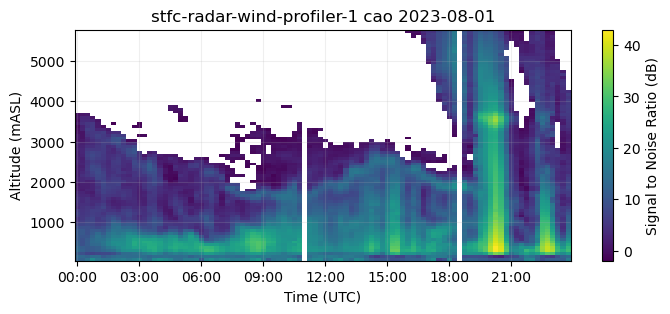

In [17]:
fig = plt.figure(figsize = (8,3))
ax = fig.add_subplot(111)

if rwp_type == 'uhf':
    signal_label ='Signal to Noise Ratio (dB)' 

if rwp_type == 'vhf':
    signal_label ='Signal Power (dB)'

# This plots a colour grid of the signal 
im = ax.pcolormesh(rwp_signal['time'], 
              rwp_signal['altitude'],
              np.transpose(rwp_signal.values),
              vmin = rwp_signal.min(),
              vmax = rwp_signal.max())

# This plots the colorbar
cbar = fig.colorbar(im, ax = ax)
cbar.set_label(signal_label)

# This sets the axis
# The dateformat is really good %H:%M means hour and minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Altitude (mASL)')
ax.grid(alpha = 0.2) 

# This creates a date string that can be used in the title of the plot
date_str = pd.to_datetime(rwp_data['time'])[0].date().strftime('%Y-%m-%d')
rwp_filename = os.path.basename(rwp_path)

# This finds the instrument name from the file attributes
instrument = rwp_filename.split('_')[0]
# This finds the location that the instrument was located from the filename
location = rwp_filename.split('_')[1]
# f is pythons F-string for string interterpolation (simplifies code enormously)
title = f'{instrument} {location} {date_str}'
# This puts the title on the plot
ax.set_title(title);

# 5. Vertical Velocity or Upward wind
Vertical velocity also known as vertical wind, w component, upward wind and upward air velocity.
Vertical velocity is the speed at which the air is rising or sinking. 
Vertical velocity is measured in ms$^{-1}$.
In the UHF RWP precipitation is observed with strong negative velocities due to falling precipitation.

The vertical velocity values have an accuracy of the order of 0.1 ms$^{-1}$, which means
that they cannot be used to identify small-magnitude synoptic-scale
vertical velocities. However, they are well-suited for identifying
mountain/convectively-generated waves and convection

Note that the UHF and VHF netcdf files have used a different naming convection for vertical velocity. The VHF has used 'upward_wind'.The UHF has used 'upward_air_velocity'. Hence in this code they have both been renamed rwp_vertical_wind

In [18]:
if rwp_type == 'vhf':
    rwp_vertical_wind = rwp_data['upward_wind']
if rwp_type =='uhf':
    rwp_vertical_wind = rwp_data['upward_air_velocity']

Upward air velocity (vertical wind)
Note that + is upward air velocity

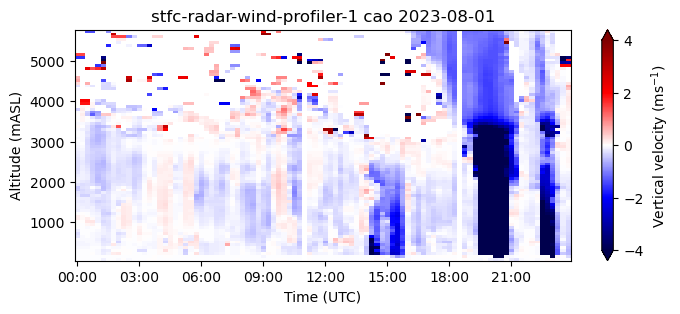

In [19]:
fig = plt.figure(figsize = (8,3))
ax = fig.add_subplot(111)

# Note that the data needs to be transposed (Data in rows is pasted into columns and vice versa)
# Note that the seismic colour map has been used this is a divergent colour map needed for vertical velocity
# that has negative and positive values.

im = ax.pcolormesh(rwp_vertical_wind['time'], 
              rwp_vertical_wind['altitude'],
              np.transpose(rwp_vertical_wind.values),
              vmin = -4,
              vmax = 4,
              cmap = 'seismic'
              )

cbar = fig.colorbar(im, ax = ax, extend = 'both')
cbar.set_label('Vertical velocity (ms$^{-1}$)')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Altitude (mASL)')

date_str = pd.to_datetime(rwp_data['time'])[0].date().strftime('%Y-%m-%d')
rwp_filename = os.path.basename(rwp_path)

instrument = rwp_filename.split('_')[0]
location = rwp_filename.split('_')[1]
title = f'{instrument} {location} {date_str}'
ax.set_title(title);

# 6. Data quality control 
Quality flags are stored in the netcdf file and can be used to remove bad data. 
This is a very important process. 

#### VHF NETCDF FILE
qc flags are 1 = good or 2 = bad

#### UHF NETCDF FILE
qc flags are 0 = not_used, 1 =  good_data, 2 =  bad_data, 3= bad_data_gates_not_available

Here we find the locations where the qc flags show good data and filter the relevent data variables to keep the good data and make everything else NaN. 

In [20]:
if rwp_type =='vhf':
    rwp_signal = rwp_data['signal_power'].where(rwp_data['qc_flag_vertical_beam']<2,np.nan) 
    rwp_spectral_width = rwp_data['spectral_width'].where(rwp_data['qc_flag_vertical_beam']<2,np.nan) 
    rwp_vertical_wind = rwp_data['upward_wind'].where(rwp_data['qc_flag_vertical_beam']<2,np.nan) 
    horizontal_qc_flag = rwp_data['qc_flag_horizontal_wind']
    rwp_u = rwp_data['eastward_wind'].where(rwp_data['qc_flag_horizontal_wind']<2,np.nan) 
    rwp_v = rwp_data['northward_wind'].where(rwp_data['qc_flag_horizontal_wind']<2,np.nan) 

if rwp_type =='uhf':
    rwp_signal = rwp_data['signal_to_noise_ratio_minimum'].where(rwp_data['qc_flag_beam_1']<2,np.nan)
    rwp_spectral_width = rwp_data['spectral_width_of_beam_3'].where(rwp_data['qc_flag_beam_1']<2,np.nan)
    rwp_vertical_wind = rwp_data['upward_air_velocity'].where(rwp_data['qc_flag_beam_1']<2,np.nan)
    rwp_u = rwp_data['eastward_wind'].where(rwp_data['qc_flag_beam_1']<2,np.nan)
    rwp_v = rwp_data['northward_wind'].where(rwp_data['qc_flag_beam_1']<2,np.nan)

#### Plot quality controlled vertical wind

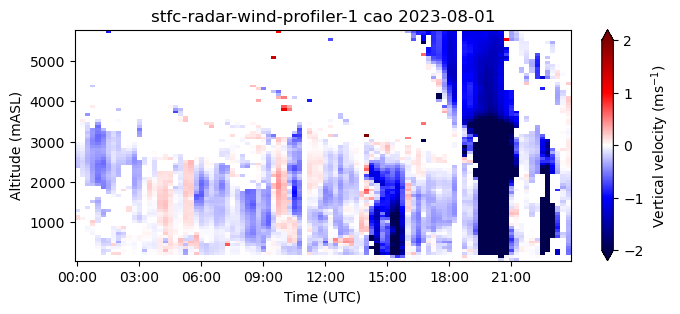

In [21]:
fig = plt.figure(figsize = (8,3))
ax = fig.add_subplot(111)

# Note that the data needs to be transposed (Data in rows is pasted into columns and vice versa)

im = ax.pcolormesh(rwp_vertical_wind['time'], 
              rwp_vertical_wind['altitude'],
              np.transpose(rwp_vertical_wind.values),
              vmin = -2,
              vmax = 2,
              cmap = 'seismic'
              )

cbar = fig.colorbar(im, ax = ax, extend = 'both')
cbar.set_label('Vertical velocity (ms$^{-1}$)')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Altitude (mASL)')

date_str = pd.to_datetime(rwp_data['time'])[0].date().strftime('%Y-%m-%d')
rwp_filename = os.path.basename(rwp_path)

instrument = rwp_filename.split('_')[0]
location = rwp_filename.split('_')[1]
title = f'{instrument} {location} {date_str}'
ax.set_title(title);

#### Plot quality controlled signal power

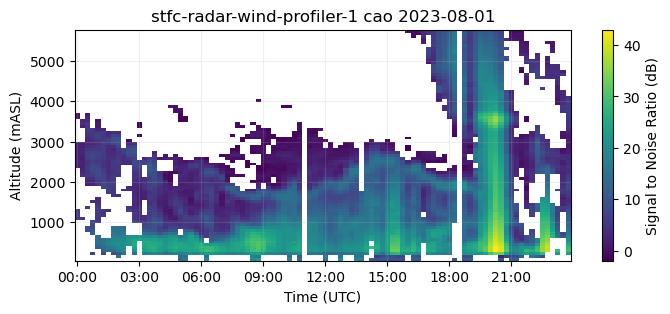

In [22]:
fig = plt.figure(figsize = (8,3))
ax = fig.add_subplot(111)

if rwp_type == 'uhf':
    signal_label ='Signal to Noise Ratio (dB)' 
if rwp_type == 'vhf':
    signal_label ='Signal Power (dB)'

im = ax.pcolormesh(rwp_signal['time'], 
              rwp_signal['altitude'],
              np.transpose(rwp_signal.values),
              vmin = rwp_signal.min(),
              vmax = rwp_signal.max())

cbar = fig.colorbar(im, ax = ax)
cbar.set_label(signal_label)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Altitude (mASL)')
ax.grid(alpha = 0.2) 

date_str = pd.to_datetime(rwp_data['time'])[0].date().strftime('%Y-%m-%d')
rwp_filename = os.path.basename(rwp_path)


instrument = rwp_filename.split('_')[0]
location = rwp_filename.split('_')[1]
title = f'{instrument} {location} {date_str}'
ax.set_title(title);

# 7. Calculate horizontal wind speed and direction 

Observations from at least three different directions from three different volumes of air are necessary to determine the wind fields from the RWP data.


Calculate windspeed from quality controlled u and v wind components.

In [23]:
rwp_windspeed = ((rwp_u**2)+(rwp_v**2))**0.5
rwp_direction = np.mod(180+np.rad2deg(np.arctan2(rwp_u, rwp_v)),360)

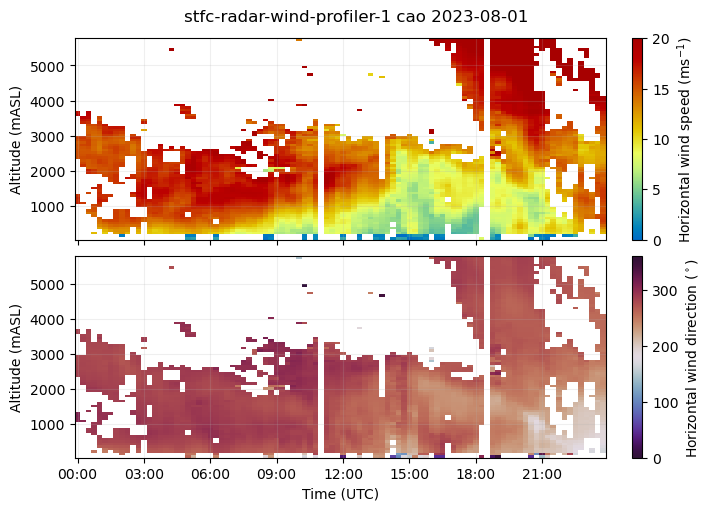

In [24]:
fig = plt.figure(figsize = (7,5), constrained_layout = True)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

plot_variables = [rwp_windspeed, rwp_direction] 
axes = [ax1, ax2]
cbar_labels = ['Horizontal wind speed (ms$^{-1}$)', 'Horizontal wind direction ($^\\circ$)']

vlim_direction = (0,360)
if rwp_type == 'uhf':
    vlim_windspeed= (0,20)
if rwp_type == 'vhf':
    vlim_windspeed =(0,40)

vlimits = [vlim_windspeed, vlim_direction]
cmaps = ['HomeyerRainbow','twilight_shifted'] # colour blind friendly colour map (viridis)
#cmaps = ['gist_ncar','gist_rainbow'] # gist_ncar shows the jet  stream better

# zip groups lists together so they are iterated over together in the for loop 
for ax, plot_data,cbar_label, vlim, cmap in zip(axes,plot_variables,cbar_labels, vlimits,cmaps):
    
    im = ax.pcolormesh(plot_data['time'], 
                       plot_data['altitude'],
                       np.transpose(plot_data.values),
                       vmin = vlim[0],
                       vmax = vlim[1],
                       cmap = cmap
                      )
    
    cbar = fig.colorbar(im, ax = ax)
    cbar.set_label(cbar_label)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.set_xlabel('Time (UTC)')
    ax.set_ylabel('Altitude (mASL)')
    ax.grid(alpha = 0.2)
    ax.label_outer()

date_str = pd.to_datetime(rwp_data['time'])[0].date().strftime('%Y-%m-%d')
rwp_filename = os.path.basename(rwp_path)

instrument = rwp_filename.split('_')[0]
location = rwp_filename.split('_')[1]
title = f'{instrument} {location} {date_str}'
fig.suptitle(title);

# 8. Plotting horizontal wind direction arrows
Note that finding a suitable colour bar to plot the wind direction in a meaningful way is not always possible especially if the wind is from the northly direction as it can oscillate between just above zero and just below 360. Instead of plotting the wind direction in colour this next bit of the code plots the wind direction as directional arrows. 
The wind arrows show the direction the wind is coming from. So a vertically pointing arrow shows the wind at that particular altitude is coming from the south. 

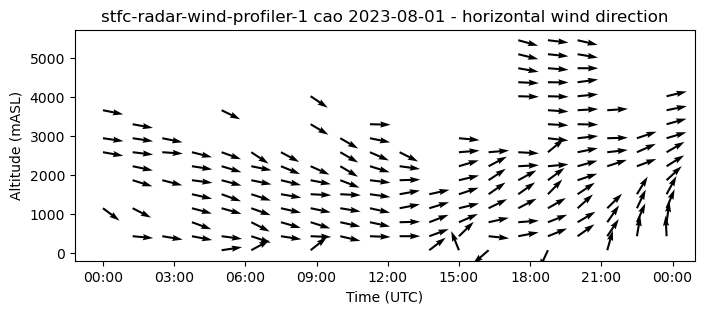

In [25]:
fig = plt.figure(figsize = (8,3))
ax = fig.add_subplot(111)

# Intervals are required for the barbs when a 24 hour period is plotted. It would also be possible

if rwp_type == 'vhf':
    barb_interval = 10

if rwp_type == 'uhf':
    barb_interval = 5

X, Y = np.meshgrid(rwp_windspeed['time'].values,rwp_data['altitude'].values)

u_binned = rwp_u.values[::barb_interval, ::barb_interval]
v_binned = rwp_v.values[::barb_interval, ::barb_interval]
# Normalise the data for uniform arrow size
u_norm = u_binned / np.sqrt(u_binned ** 2.0 + v_binned ** 2.0)
v_norm = v_binned / np.sqrt(u_binned ** 2.0 + v_binned ** 2.0)
ax.quiver(X[::barb_interval, ::barb_interval],Y[::barb_interval, ::barb_interval],
          np.transpose(u_norm),
          np.transpose(v_norm), scale=30, scale_units="width")

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Altitude (mASL)')

date_str = pd.to_datetime(rwp_data['time'])[0].date().strftime('%Y-%m-%d')
rwp_filename = os.path.basename(rwp_path)

instrument = rwp_filename.split('_')[0]
location = rwp_filename.split('_')[1]
title = f'{instrument} {location} {date_str} - horizontal wind direction'
ax.set_title(title);

# 9. Plotting Horizontal wind speed and direction with wind arrows
It is difficult to interpret the colour bars for the wind direction so we use wind arrows as these are much clearer.

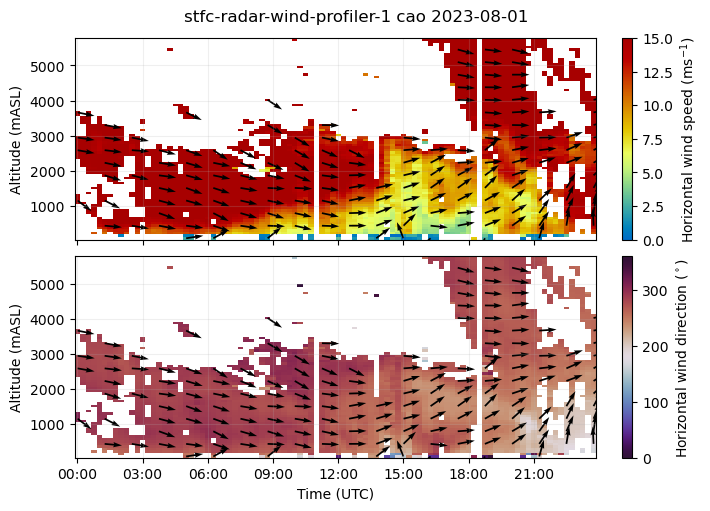

In [26]:
fig = plt.figure(figsize = (7,5), constrained_layout = True)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

plot_variables = [rwp_windspeed, rwp_direction] 
axes = [ax1, ax2]
cbar_labels = ['Horizontal wind speed (ms$^{-1}$)', 'Horizontal wind direction ($^\\circ$)']

vlim_direction = (0,360)
if rwp_type == 'uhf':
    vlim_windspeed= (0,15)
if rwp_type == 'vhf':
    vlim_windspeed =(0,60)

vlimits = [vlim_windspeed, vlim_direction]
cmaps = ['HomeyerRainbow','twilight_shifted']
# zip groups lists together so they are iterated over together in the for loop 
for ax, plot_data,cbar_label, vlim, cmap in zip(axes,plot_variables,cbar_labels, vlimits,cmaps):
    
    im = ax.pcolormesh(plot_data['time'], 
                       plot_data['altitude'],
                       np.transpose(plot_data.values),
                       vmin = vlim[0],
                       vmax = vlim[1],
                       cmap = cmap
                      )
    
    cbar = fig.colorbar(im, ax = ax)
    cbar.set_label(cbar_label)

    if rwp_type == 'vhf':
        barb_interval = 10

    if rwp_type == 'uhf':
        barb_interval = 5
    
    X, Y = np.meshgrid(rwp_windspeed['time'].values,rwp_data['altitude'].values)
    
    u_binned = rwp_u.values[::barb_interval, ::barb_interval]
    v_binned = rwp_v.values[::barb_interval, ::barb_interval]
    # Normalise the data for uniform arrow size
    u_norm = u_binned / np.sqrt(u_binned ** 2.0 + v_binned ** 2.0)
    v_norm = v_binned / np.sqrt(u_binned ** 2.0 + v_binned ** 2.0)
    ax.quiver(X[::barb_interval, ::barb_interval],Y[::barb_interval, ::barb_interval],
              np.transpose(u_norm),
              np.transpose(v_norm), scale=30, scale_units="width")

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.set_xlabel('Time (UTC)')
    ax.set_ylabel('Altitude (mASL)')
    ax.grid(alpha = 0.2)
    ax.label_outer()

date_str = pd.to_datetime(rwp_data['time'])[0].date().strftime('%Y-%m-%d')
rwp_filename = os.path.basename(rwp_path)

instrument = rwp_filename.split('_')[0]
location = rwp_filename.split('_')[1]
title = f'{instrument} {location} {date_str}'
fig.suptitle(title);

# 10. Plotting the spectral width
Interpreting this for the course is not necessary but it is included. 

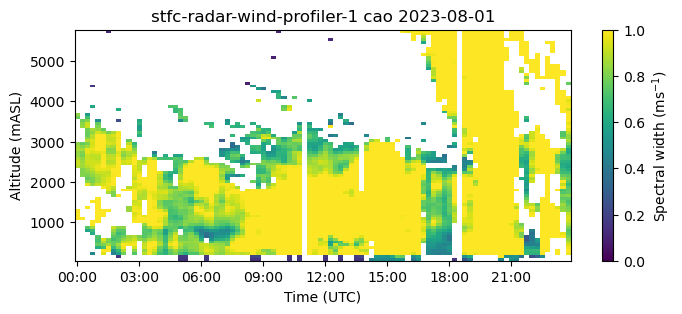

In [27]:
fig = plt.figure(figsize = (8,3))
ax = fig.add_subplot(111)

# Note that the data needs to be transposed (Data in rows is pasted into columns and vice versa)
# cmap gist_ncar rainbow type
# cmap

im = ax.pcolormesh(rwp_spectral_width['time'], 
              rwp_spectral_width['altitude'],
              np.transpose(rwp_spectral_width.values),
              vmin = 0,
              vmax = 1,
              cmap = 'viridis'
              )

cbar = fig.colorbar(im, ax = ax, extend = 'neither')
cbar.set_label('Spectral width (ms$^{-1}$)')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Altitude (mASL)')

date_str = pd.to_datetime(rwp_data['time'])[0].date().strftime('%Y-%m-%d')
rwp_filename = os.path.basename(rwp_path)

instrument = rwp_filename.split('_')[0]
location = rwp_filename.split('_')[1]
title = f'{instrument} {location} {date_str}'
ax.set_title(title);

# 12. Slicing Data - Time series plots at a choosen altitude
It can be useful to visualise the data in a different way and pick altitudes of interest.
Plotting data in this way is better for quantitative analysis of this type of data. But it does not tell you about the time continuity of the pattern.

Time altitude plots are very good for revealing the overall pattern in the Radar wind profiler data.  

This bit of code plots the nearest altitude to the choosen altitude.


Text(0, 0.5, 'vertical wind (ms$^{-1}$)')

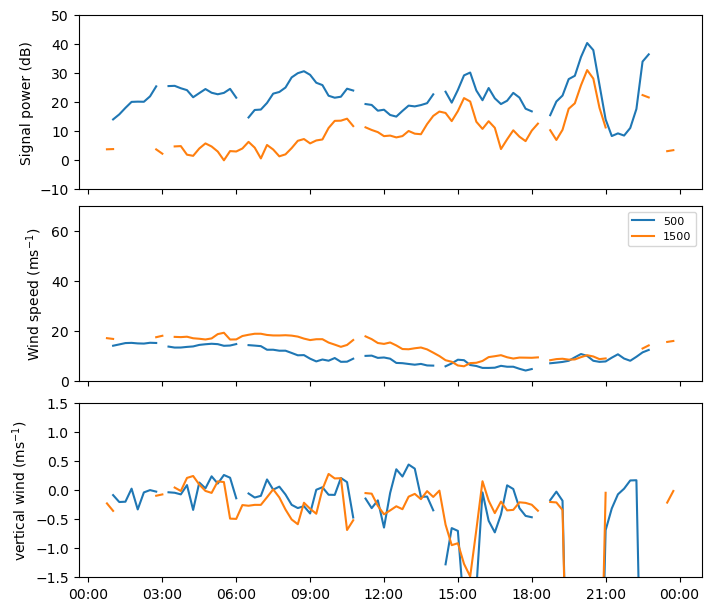

In [28]:
# Here the altitudes are choosen
if rwp_type == 'uhf':
    plot_alts = ['500', '1500']
    range_signal = [-10,50]
if rwp_type == 'vhf':
    plot_alts = ['2000', '10000']
    range_signal = [0,150]
    
#plot_alt = pd.(rwp_data['altitude'])

fig = plt.figure(figsize = (7,6), constrained_layout = True)
# number of plots is 3 in the vertical, hspace is the horizontal space between plots
gs = fig.add_gridspec(3,1, hspace=0.04, wspace=0.2)
# sharex means the x axis is shared
ax1,ax2,ax3 = gs.subplots(sharex=True)

# uses the select function in xarray
windspeed_sel = rwp_windspeed.sel(altitude=plot_alts, method = 'nearest')
signal_sel = rwp_signal.sel(altitude=plot_alts, method = 'nearest')
vertical_wind_sel = rwp_vertical_wind.sel(altitude=plot_alts, method = 'nearest')

ax1.plot(signal_sel['time'],signal_sel)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.set_ylim(range_signal)
ax1.set_ylabel('Signal power (dB)')

ax2.plot(windspeed_sel['time'], windspeed_sel,label = plot_alts)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.set_ylim(0, 70)
ax2.set_ylabel('Wind speed (ms$^{-1}$)',)
ax2.legend(fontsize = 8)

ax3.plot(vertical_wind_sel['time'], vertical_wind_sel)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax3.set_ylim(-1.5, 1.5)
ax3.set_ylabel('vertical wind (ms$^{-1}$)')

# 13. Plot an Altitude profile plots at choosen times
It can be useful to visualise the data in a different way and pick out times of interest and plot them. 
Altitude profile plots are very good for revealing vertical structures in the Radar wind profiler data.  But time series and altitude profiles are better for quantitative analysis.

This bit of code plots the nearest time to choosen times

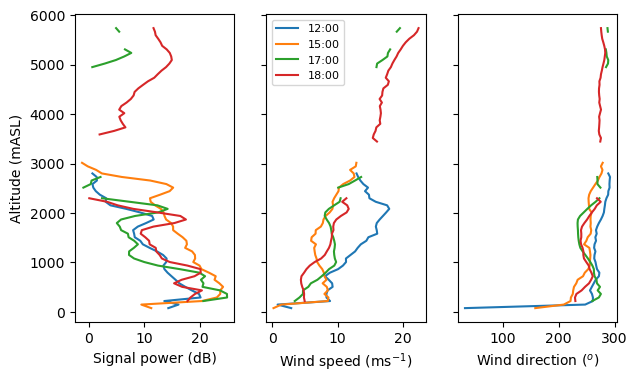

In [29]:
#plot_times = ['06:00', '09:00','12:00','15:00', '18:00']
plot_times = ['12:00','15:00', '17:00', '18:00',]

plot_date = pd.to_datetime(rwp_data['time'])[0].date().strftime('%Y-%m-%d')

fig = plt.figure(figsize = (7,4))
gs = fig.add_gridspec(1,3, hspace=0, wspace=0.2)
ax1,ax2,ax3 = gs.subplots(sharey=True)

for plot_time in plot_times:
    plot_datetime = pd.to_datetime(f'{plot_date} {plot_time}')
    windspeed_sel = rwp_windspeed.sel(time=plot_datetime,method = 'nearest')
    direction_sel = rwp_direction.sel(time=plot_datetime,method = 'nearest')
    signal_sel = rwp_signal.sel(time=plot_datetime,method = 'nearest')
    spectral_width_sel = rwp_spectral_width.sel(time=plot_datetime,method = 'nearest')
    
    
    ax1.plot(signal_sel, signal_sel['altitude'])
    ax1.set_ylabel('Altitude (mASL)')
    ax1.set_xlabel('Signal power (dB)')
    
    ax2.plot(windspeed_sel, windspeed_sel['altitude'], label = plot_time)
    ax2.set_xlabel('Wind speed (ms$^{-1}$)',)
    ax2.legend(fontsize = 8)

    ax3.plot(direction_sel, direction_sel['altitude'])
    ax3.set_xlabel('Wind direction ($^{o}$)')
    
    #ax3.plot(spectral_width_sel, spectral_width_sel['altitude'])
    #ax3.set_xlabel('Spectral width (ms$^{-1}$)')